In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('drive/My Drive')

In [3]:
cd darknet

/content/drive/My Drive/darknet


      Unnamed: 0  label           x  ...  confidence.1.2  count.1.2  companion
0              0      5  325.256836  ...           99.15         30          0
1              1      5  354.194641  ...           98.80         30          0
2              2      5  360.104584  ...           98.39         30          0
3              3      5  541.546082  ...           99.63         17          0
4              4      5  548.711060  ...            0.00          0          0
...          ...    ...         ...  ...             ...        ...        ...
8383        8383      5  352.872131  ...           91.52         28          2
8384        8384      5  377.329163  ...           88.56         29          2
8385        8385      5  277.477753  ...           87.17         26          2
8386        8386      5  261.917877  ...           95.14         15          2
8387        8387      5  409.791443  ...           98.95         17          2

[8388 rows x 32 columns]
      Unnamed: 0  label   

"\ntrain_sizes,train_score,test_score = learning_curve(rfc,X,y,train_sizes=[0.1,0.2,0.4,0.6,0.8,1],cv=10,scoring='accuracy')\ntrain_acc =  np.mean(train_score,axis=1)\ntest_acc = np.mean(test_score,axis=1)\nplt.plot(train_sizes,train_acc,'o-',color = 'r',label = 'training')\nplt.plot(train_sizes,test_acc,'o-',color = 'g',label = 'testing')\nplt.legend(loc='best')\nplt.xlabel('traing examples')\nplt.ylabel('accuracy')\nplt.show()\n\ntrain_sizes,train_score,test_score = learning_curve(xgbc,X,y,train_sizes=[0.1,0.2,0.4,0.6,0.8,1],cv=10,scoring='accuracy')\ntrain_acc =   np.mean(train_score,axis=1)\ntest_acc =  np.mean(test_score,axis=1)\nplt.plot(train_sizes,train_acc,'o-',color = 'r',label = 'training')\nplt.plot(train_sizes,test_acc,'o-',color = 'g',label = 'testing')\nplt.legend(loc='best')\nplt.xlabel('traing examples')\nplt.ylabel('accuracy')\nplt.show()\n"

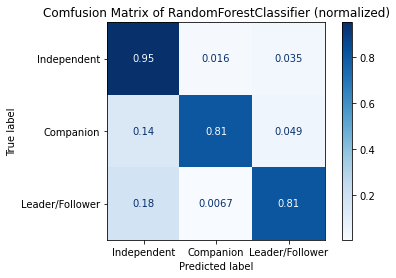

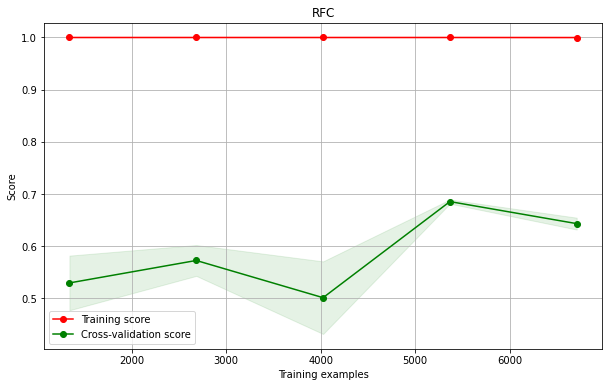

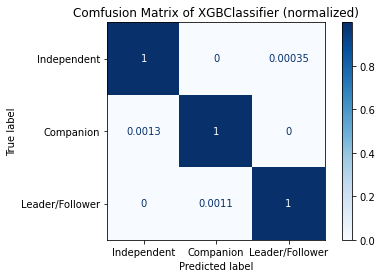

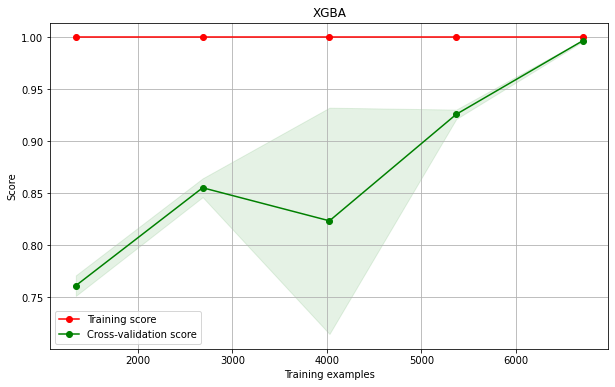

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
a1=pd.read_csv("final_result_new_v2_012.csv")
print(a1)
print(a1.drop("companion", axis = 1))
print(a1["companion"])
X = a1.drop("companion", axis = 1)
y = a1["companion"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print('The accuracy of Random Forest Classifier on testing set:', rfc.score(X_test, y_test))
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
disp=plot_confusion_matrix(rfc,X,y,display_labels=['Independent', 'Companion', 'Leader/Follower'],cmap=plt.cm.Blues,normalize='true')
disp.ax_.set_title("Comfusion Matrix of RandomForestClassifier (normalized)")


import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure(figsize=(10,6))  #調整圖的大小
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


from sklearn.model_selection import KFold,StratifiedKFold
cv = KFold(n_splits=5, random_state=4, shuffle=True)

plot_learning_curve(rfc, "RFC", X,y , cv=cv, train_sizes=np.linspace(0.2, 1.0, 5)) 


from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)
print('The accuracy of eXtreme Gradient Boosting Classifier on testing set:', xgbc.score(X_test, y_test))

disp=plot_confusion_matrix(xgbc,X,y,display_labels=['Independent', 'Companion', 'Leader/Follower'],cmap=plt.cm.Blues,normalize='true')
disp.ax_.set_title("Comfusion Matrix of XGBClassifier (normalized)")

plot_learning_curve(xgbc, "XGBA", X,y , cv=cv, train_sizes=np.linspace(0.2, 1.0, 5)) 

from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

"""
train_sizes,train_score,test_score = learning_curve(rfc,X,y,train_sizes=[0.1,0.2,0.4,0.6,0.8,1],cv=10,scoring='accuracy')
train_error =  1- np.mean(train_score,axis=1)
test_error = 1- np.mean(test_score,axis=1)
plt.plot(train_sizes,train_error,'o-',color = 'r',label = 'training')
plt.plot(train_sizes,test_error,'o-',color = 'g',label = 'testing')
plt.legend(loc='best')
plt.xlabel('traing examples')
plt.ylabel('error')
plt.show()

train_sizes,train_score,test_score = learning_curve(xgbc,X,y,train_sizes=[0.1,0.2,0.4,0.6,0.8,1],cv=10,scoring='accuracy')
train_error =  1- np.mean(train_score,axis=1)
test_error = 1- np.mean(test_score,axis=1)
plt.plot(train_sizes,train_error,'o-',color = 'r',label = 'training')
plt.plot(train_sizes,test_error,'o-',color = 'g',label = 'testing')
plt.legend(loc='best')
plt.xlabel('traing examples')
plt.ylabel('error')
plt.show()
"""
"""
train_sizes,train_score,test_score = learning_curve(rfc,X,y,train_sizes=[0.1,0.2,0.4,0.6,0.8,1],cv=10,scoring='accuracy')
train_acc =  np.mean(train_score,axis=1)
test_acc = np.mean(test_score,axis=1)
plt.plot(train_sizes,train_acc,'o-',color = 'r',label = 'training')
plt.plot(train_sizes,test_acc,'o-',color = 'g',label = 'testing')
plt.legend(loc='best')
plt.xlabel('traing examples')
plt.ylabel('accuracy')
plt.show()

train_sizes,train_score,test_score = learning_curve(xgbc,X,y,train_sizes=[0.1,0.2,0.4,0.6,0.8,1],cv=10,scoring='accuracy')
train_acc =   np.mean(train_score,axis=1)
test_acc =  np.mean(test_score,axis=1)
plt.plot(train_sizes,train_acc,'o-',color = 'r',label = 'training')
plt.plot(train_sizes,test_acc,'o-',color = 'g',label = 'testing')
plt.legend(loc='best')
plt.xlabel('traing examples')
plt.ylabel('accuracy')
plt.show()
"""